# Import libraries

In [99]:
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
%matplotlib inline

# Load data

In [100]:
sewing = pd.read_csv('../data/sewing_raw.csv')
printing = pd.read_csv('../data/3dprinting_raw.csv')

In [101]:
sewing.shape

(2000, 80)

In [102]:
printing.shape

(2000, 80)

#### Extract necessary data for modeling

In [103]:
sewing = sewing[['subreddit', 'selftext', 'title']]
printing = printing[['subreddit', 'selftext', 'title']]

In [104]:
sewing

,subreddit,selftext,title
0,sewing,NaN,Just finished this late (nowhere near accurate...
1,sewing,NaN,Too excited to not share! Almost finished with...
2,sewing,NaN,A different view of the this 2 piece set I mad...
3,sewing,NaN,I made this 2 piece set for 4th of July. Ruche...
4,sewing,NaN,First sewing project! Sometimes you gotta leap...
...,...,...,...
1995,sewing,NaN,Looking for Vogue 9374 in Large or XL
1996,sewing,I’m still fairly new to sewing and having a go...,Zip and Waistband question!
1997,sewing,NaN,Looking for Vogue 8669 in Large or XL Caftan P...
1998,sewing,NaN,"Was sewing late... Sophie wanted to go to bed,..."


In [105]:
printing

,subreddit,selftext,title
0,3Dprinting,NaN,How to fix these gaps in 3d printing layers?
1,3Dprinting,NaN,So close yet still so far..
2,3Dprinting,NaN,"I've started a weekly vlog, documenting my 3D ..."
3,3Dprinting,NaN,Filaments here! Now I just gotta wait for the ...
4,3Dprinting,NaN,Is two-part epoxy enough to hold these printed...
...,...,...,...
1995,3Dprinting,"Hello! I'm new to 3D Printing, I just recentl...","The best way to get that nice, smooth, texture?"
1996,3Dprinting,NaN,Almost had enough filament!
1997,3Dprinting,Ok so here is the problem I have / try to solv...,Is there a way to use Filament Runout Sensors ...
1998,3Dprinting,Ok so here is the problem I have / try to solv...,Is there a way to use Filamnt Runout Sensors (...


# Cleaning

##### Looking at the printing, there is a dupulication at the index 1997 and 1998

In [106]:
print('sewing duplication:' + str(sewing.duplicated().sum()))
print('printing duplication:' + str(printing.duplicated().sum()))

sewing duplication:24
printing duplication:42


#### Drop duplications

In [107]:
sewing.drop_duplicates(inplace=True)
printing.drop_duplicates(inplace=True)

In [108]:
print('sewing duplication:' + str(sewing.duplicated().sum()))
print('printing duplication:' + str(printing.duplicated().sum()))

sewing duplication:0
printing duplication:0


In [109]:
sewing.shape

(1976, 3)

In [110]:
printing.shape

(1958, 3)

#### Check null

In [111]:
sewing.isnull().sum()

subreddit       0
selftext     1248
title           0
dtype: int64

In [112]:
printing.isnull().sum()

subreddit       0
selftext     1181
title           0
dtype: int64

There were a lot of null on the selftext. For keeping the title information, the nulls are going to be filled with 'none text'

#### Fill null with 'none text'

In [113]:
sewing['selftext'].fillna('none text', inplace=True)
printing['selftext'].fillna('none text', inplace=True)

In [114]:
sewing.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [115]:
printing.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

##### The cell below was used for checking what words the data contained

In [130]:
"""for i in sewing['selftext']:
    print(i)"""

"for i in sewing['selftext']:\n    print(i)"

#### Remove html tags

In [117]:
def remove_html(text):
    soup = BeautifulSoup(text)
    
    return soup.get_text()

#### Remove URL

In [118]:
def remove_url(text):
    new_text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    return new_text

#### Remove not words

In [129]:
def remove_not_words(text):
    new_text = re.sub('[^a-zA-Z]', ' ', text)
    
    return new_text

#### Stemming

In [121]:
def stemming(text):
    p_stemmer = PorterStemmer()
    split_list = text.lower().split()
    stemmed = [p_stemmer.stem(i) for i in split_list]
    
    return ' '.join(stemmed)

#### Clean text

In [122]:
def clean_text(text):
    rem_html_text = remove_html(text)
    
    rem_url_text = remove_url(rem_html_text)
    
    rem_not_words_text = remove_not_words(rem_url_text)
    
    stem_text = stemming(rem_not_words_text)
    
    return stem_text

In [123]:
sewing['selftext'] = sewing['selftext'].apply(lambda x: clean_text(x))
sewing['title'] = sewing['title'].apply(lambda x: clean_text(x))
printing['selftext'] = printing['selftext'].apply(lambda x: clean_text(x))
printing['title'] = printing['title'].apply(lambda x: clean_text(x))

In [124]:
sewing.shape

(1976, 3)

# Combine the selftext and the title

In [125]:
sewing['combined_text'] = sewing['selftext'] + ' ' + sewing['title']
printing['combined_text'] = printing['selftext'] + ' ' + printing['title']

In [126]:
sewing['combined_text']

0       none text just finish thi late nowher near acc...
1       none text too excit to not share almost finish...
2       none text a differ view of the thi piec set i ...
3       none text i made thi piec set for th of juli r...
4       none text first sew project sometim you gotta ...
                              ...                        
1995                none text look for vogu in larg or xl
1996    i m still fairli new to sew and have a go at m...
1997    none text look for vogu in larg or xl caftan p...
1998    none text wa sew late sophi want to go to bed ...
1999                           none text match stripe win
Name: combined_text, Length: 1976, dtype: object

# Combine sewing with printing

In [127]:
final = pd.concat([sewing, printing])

# Save the final

In [128]:
final.to_csv('../data/final.csv', index=False)

# Plot data to see high freaquent words

##### Sewing

In [30]:
cvec = CountVectorizer(max_features=20, stop_words='english')

sewing_cvec = cvec.fit_transform(sewing['combined_text'])

In [31]:
sewing_df = pd.DataFrame(sewing_cvec.todense(), columns=cvec.get_feature_names())

In [32]:
sewing_word_sum = sewing_df.sum().sort_values()

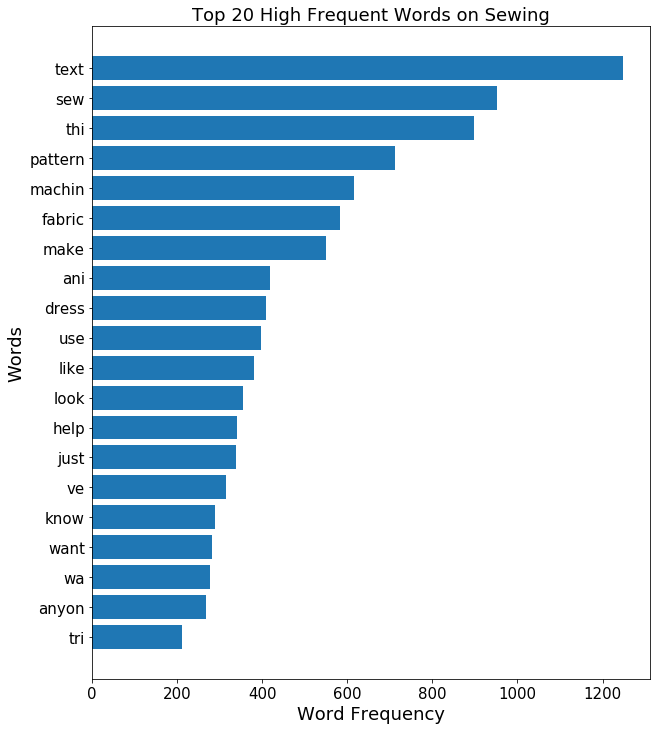

In [33]:
plt.figure(figsize=(10,12));
plt.barh(sewing_word_sum.index, sewing_word_sum);
plt.title('Top 20 High Frequent Words on Sewing', fontsize=18)
plt.xlabel('Word Frequency', fontsize=18)
plt.ylabel('Words', fontsize=18)
plt.tick_params(labelsize=15)

##### 3Dprinting

In [34]:
cvec = CountVectorizer(max_features=20, stop_words='english')

printing_cvec = cvec.fit_transform(printing['combined_text'])

In [35]:
printing_df = pd.DataFrame(printing_cvec.todense(), columns=cvec.get_feature_names())

In [36]:
printing_word_sum = printing_df.sum().sort_values()

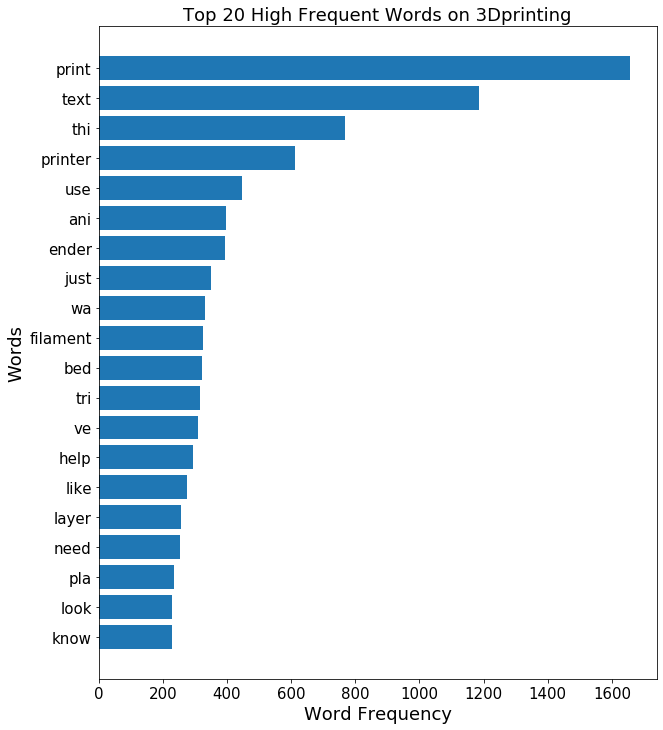

In [37]:
plt.figure(figsize=(10,12));
plt.barh(printing_word_sum.index, printing_word_sum);
plt.title('Top 20 High Frequent Words on 3Dprinting', fontsize=18)
plt.xlabel('Word Frequency', fontsize=18)
plt.ylabel('Words', fontsize=18)
plt.tick_params(labelsize=15)

##### The sewing data has some unique words such as sew, fabric, dress, etc, whereas the 3Dprinting has print, filament, etc. Those unique words are probably going to affect the prediction strongly. On next note book, models are going to be created using these data.